# Credit Card Fraud Detection

# Introduction
The dataset contains transactions made by credit cards in September 2013 by European cardholders in two days. Due to confidentiality issues, the original features and more background information about the dasta cannot be provided. 

The dataset is highly imbalanced, as only 492 out of 284,807 transactions are fraudulent.

This is a binary classification with the danger of underfitting, as we have a highly imbalanced dataset. Therefore pre-processing is required, prior to creating the model.

# Objectives

* Explore the dataset
* Pre-process
    * Scale Features
    * Balance Dataset
* Train Prediction Models
* Evaluate Models

# Exploring the dataset

Here we are going to explore the dataset, but first we need to import some libraries and the dataset.

## General information

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/joelc/Documents/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We see, that there are 31 features where 28 are labeled V+Number.
Then we also have the Time, Amount, and Class feature. All features have the float64 datatype with the exception of Class, as it only needs the values 0 and 1.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Thankfully, there are no null values in the data frame. We do not have to account for any missing data. This does not however mean, that the data is clean. Most columns are due to security reasons not accurately defined. We can at least check that there are not negative time and amount values. We continue under the assumption, that the data is clean and no further cleaning is required.

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can now check the distribution of the classification. As previously indicated, the valid transactions heavily outweigh fraudulent transactions.

In [6]:
PercentValid = round(df['Class'].value_counts()[0]/len(df) * 100,2)
PercentFraud = round(df['Class'].value_counts()[1]/len(df) * 100,2)
print(PercentValid, '% of the transactions are valid and',PercentFraud,'% of the transactions are fraudulent.')

99.83 % of the transactions are valid and 0.17 % of the transactions are fraudulent.


We can gather some more information on fraudulent cases, to get a grip on the characteristics of these cases.

In [7]:
fraud = df[df['Class']==1]

valid = df[df['Class']==0]

print(fraud.shape, valid.shape)

(492, 31) (284315, 31)


In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('The minimum amount is: ', min(df.Amount),'\n',
      'The maximum amount is: ', max(df.Amount))
df['Class'].value_counts()

The minimum amount is:  0.0 
 The maximum amount is:  25691.16


0    284315
1       492
Name: Class, dtype: int64

## Imbalance of Dataset

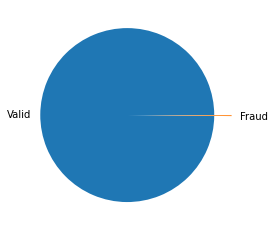

In [10]:
piegraph = np.array([PercentValid,PercentFraud])
classes = ["Valid", "Fraud"]
fraud = [0, 0.2]

plt.pie(piegraph, labels = classes, explode = fraud)
plt.show() 

We observe the imbalance of the dataset. This is problematic as learning on an imbalanced dataframe could lead to underfitting and difficulties in detecting the underrepresented class. The model would then predict that all transactions are valid which would yield good evaluation metrics but  it would not detect any fraudulent cases, which ultimately we want to predict. Therefore we need to preprocess the data to create a more balanced dataset. Before we balance the dataset however, we have observed, that the time and amount columns are not yet scaled. This is done prior to the balancing.

(0.0, 25691.16)

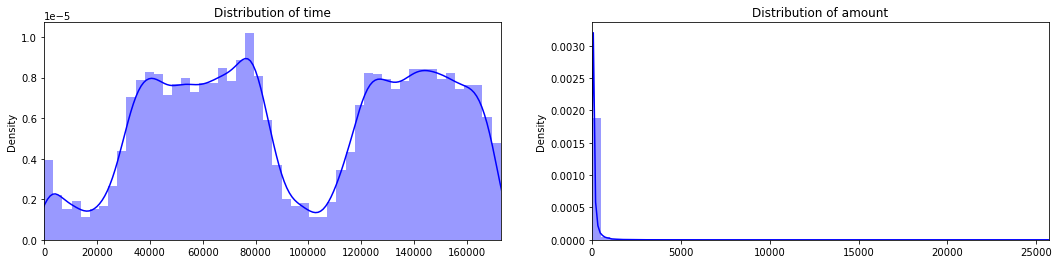

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,4))

time = df['Time'].values
amount = df['Amount'].values

sns.distplot(time, ax=ax1, color='b')
ax1.set_title('Distribution of time')
ax1.set_xlim([min(time), max(time)])

sns.distplot(amount, ax=ax2, color='b')
ax2.set_title('Distribution of amount')
ax2.set_xlim([min(amount), max(amount)])

The features transaction amount and time are not yet scaled.
Feature scaling is used to normalize the range of independent features of the data. If the ranges of the values vary greatly, some functions in machine learning will not properly work without prior scaling. The distance between points is often used for classification and normalizing the ranges of all features is necessary so that all features contribute proportionately to the final distance.
Gradient descent also converges much faster with scaled features.

### Feature correlation

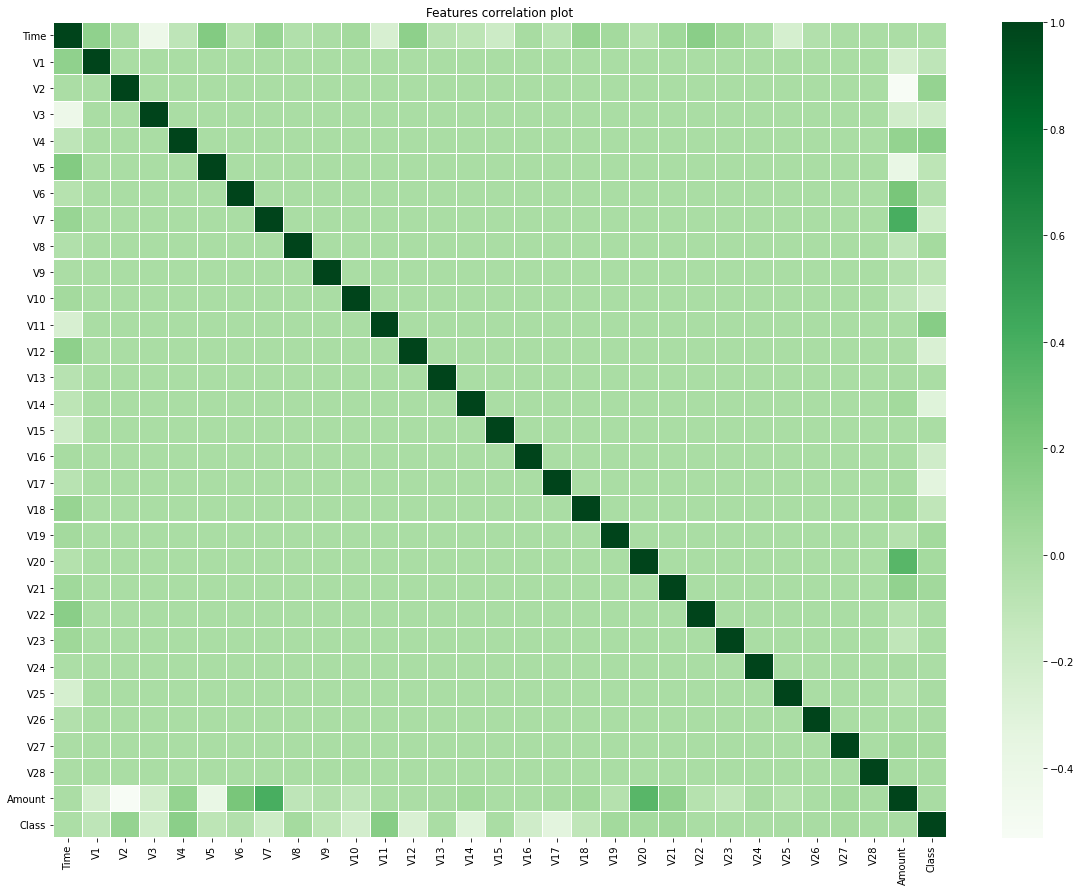

In [12]:
plt.figure(figsize = (20,15))
plt.title('Features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot = False)
plt.show()

This figure displays the correlations between the features in the dataset.
So far no significant correlation between the features is visible. However we need to check for correlation after we balance the dataset again, as the imbalanced data set does not say much, except some correlation between features and the amount.

# Preprocessing

## Scaling Time and Amount

We use the robust scaler to scale the features time and amount. The robust scaler is robust to outliers and removes the median and scales the data according to the quantile range.

In [13]:
from sklearn.preprocessing import RobustScaler

rsc = RobustScaler()
df['Amount_scaled'] = rsc.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = rsc.fit_transform(df['Time'].values.reshape(-1,1))
# df.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


We see, that the time and amount features are more intact with the other features. With this change we will be able to perform more accurate analysis, especially when examining correlations between the features.

## Sampling Dataset

As mentioned before, we need to balance the dataset to get good predictions.
Without balanced data, many traditionally used models would not accurately find fraudulent cases. Additionally, as we saw before, the imbalanced data set does not give us information about the correlation between the features and how they influence the classification.
One can use sampling to get rid of the imbalance:

* Sub-sampling (Under-sampling): Reducing size of the abundant class. Used when quantity of data is sufficient
* Over-sampling: Increase the size of rare samples by using repetition, or bootstrapping. Used when the quantity of data is insufficient

Other methods such as resampling with different ratios or ensembling multiple models with different resampled datasets.
SMOTE (Synthetic Minority Oversampling Technique) is another widely used technique for balancing datasets. It synthesizes examples from the underrepresented class, by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

However for now, we will only be using the sampling techniques to balance the data. If I have more time, I will add evaluation of a dataset balanced using SMOTE.

### Undersampling

Next we will be under sampling the data set.
Random Undersampling uses all instances of the minor class and randomly cuts the bigger class to the size of the smaller one. As we already saw, we have 492 fraudulent cases. 
Before we remove some instances, we shuffle the dataset.

In [15]:
# Shuffling data

df = df.sample(frac=1)

df_fraud = df.loc[df['Class'] == 1]
df_valid = df.loc[df['Class'] == 0][:492]

df_usp = pd.concat([df_fraud, df_valid])
df_under = df_usp.sample(frac=1, random_state=42)

df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 220985 to 42590
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           984 non-null    float64
 1   V1             984 non-null    float64
 2   V2             984 non-null    float64
 3   V3             984 non-null    float64
 4   V4             984 non-null    float64
 5   V5             984 non-null    float64
 6   V6             984 non-null    float64
 7   V7             984 non-null    float64
 8   V8             984 non-null    float64
 9   V9             984 non-null    float64
 10  V10            984 non-null    float64
 11  V11            984 non-null    float64
 12  V12            984 non-null    float64
 13  V13            984 non-null    float64
 14  V14            984 non-null    float64
 15  V15            984 non-null    float64
 16  V16            984 non-null    float64
 17  V17            984 non-null    float64
 18  V18

Fraud:  50.0 % Valid:  50.0 %


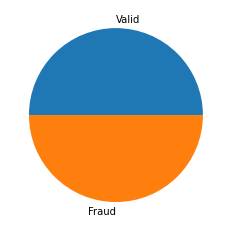

In [16]:
PerValid = round(df_under['Class'].value_counts()[0]/len(df_under) * 100,2)
PerFraud = round(df_under['Class'].value_counts()[1]/len(df_under) * 100,2)

print('Fraud: ', PerFraud, '% Valid: ', PerValid, '%')

piegraph = np.array([PerValid,PerFraud])
classes = ["Valid", "Fraud"]

plt.pie(piegraph, labels = classes)
plt.show() 

### Splitting Data Set

We split the dataframe into different parts: a training set and a test set. Sometimes a validation set is also created, however in this case we do not use it. 
It is important to perform this split, because if we want to later evaluate the models, the testing needs to be performed on data not used for training the models. Otherwise, the model would perform well on the data, because it was used for training. We need to do it before we sample the data, as we want to train our data on balanced data, but also test it in realistic environments.

There are multiple options to split the dataset:

* Split based on percentages
* k-fold cross validation
* Leave-one-out Cross Validation/Jackknifing
* Bootstrapping

There are more options, but here we will be spliiting based on percentages and k-fold cross validation.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn import svm

In [33]:
# Differenitate Data and classifier

X = df.drop('Class', axis = 1)
y = df['Class']

X_under = df_under.drop('Class', axis = 1)
y_under = df_under['Class']

# Original Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Undersampled Dataset splitting
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)

print('Number of Training transactions| Original:',len(X_train),'| Undersampled: ',len(X_train_under))
print('Number of Testing transactions| Original:',len(X_test),'| Undersampled: ',len(X_test_under))

print('Training Features Shape:', X_train_under.shape)
print('Training Labels Shape:', y_train_under.shape)
print('Testing Features Shape:', X_test_under.shape)
print('Testing Labels Shape:', y_test_under.shape)

Number of Training transactions| Original: 227845 | Undersampled:  787
Number of Testing transactions| Original: 56962 | Undersampled:  197
Training Features Shape: (787, 32)
Training Labels Shape: (787,)
Testing Features Shape: (197, 32)
Testing Labels Shape: (197,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

def run_test(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['Valid', 'Fraud']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
        cv_results = model_selection.cross_validate(model, X_train_under, y_train_under, cv=kfold, scoring=scoring)
        clf = model.fit(X_train_under, y_train_under)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

Here we see the classification report using k-fold cross validation using 10 folds. We can observe, that in general Logistic Regression and Random Forests outperform the other models. The SVM classification performs the worst out of the five models. 

In [21]:
run_test(X_train_under, y_train_under, X_test_under, y_test_under)

LogReg
              precision    recall  f1-score   support

       Valid       0.91      0.99      0.95        87
       Fraud       0.99      0.93      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197

RF
              precision    recall  f1-score   support

       Valid       0.91      1.00      0.95        87
       Fraud       1.00      0.92      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197

KNN
              precision    recall  f1-score   support

       Valid       0.61      0.72      0.66        87
       Fraud       0.74      0.63      0.68       110

    accuracy                           0.67       197
   macro avg       0.67      0.68      0.67       197
weighted avg       0.68      0.67      0.67       197

SVM
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.035998,0.007998,0.936709,0.938967,0.936709,0.936463,0.965894,LogReg
1,0.020001,0.008000,0.974684,0.976173,0.974684,0.974792,0.998670,LogReg
2,0.028001,0.007999,0.924051,0.925093,0.924051,0.923978,0.974359,LogReg
3,0.024004,0.003997,0.898734,0.910078,0.898734,0.899223,0.933333,LogReg
4,0.023999,0.008001,0.949367,0.950430,0.949367,0.949286,0.982028,LogReg
5,0.023999,0.008001,0.974684,0.974684,0.974684,0.974684,0.992686,LogReg
6,0.019999,0.004000,0.898734,0.912683,0.898734,0.900470,0.950980,LogReg
7,0.020000,0.004000,0.948718,0.953602,0.948718,0.948650,0.976316,LogReg
8,0.016000,0.008001,0.948718,0.948718,0.948718,0.948718,0.989453,LogReg
9,0.020000,0.004000,0.948718,0.948718,0.948718,0.948718,0.992450,LogReg


## Confusion Matrix

The Confusion Matrix is another simple way of visualizing the performances of prediction models. Here we split the data set into a 80% training set and a 20% test set.

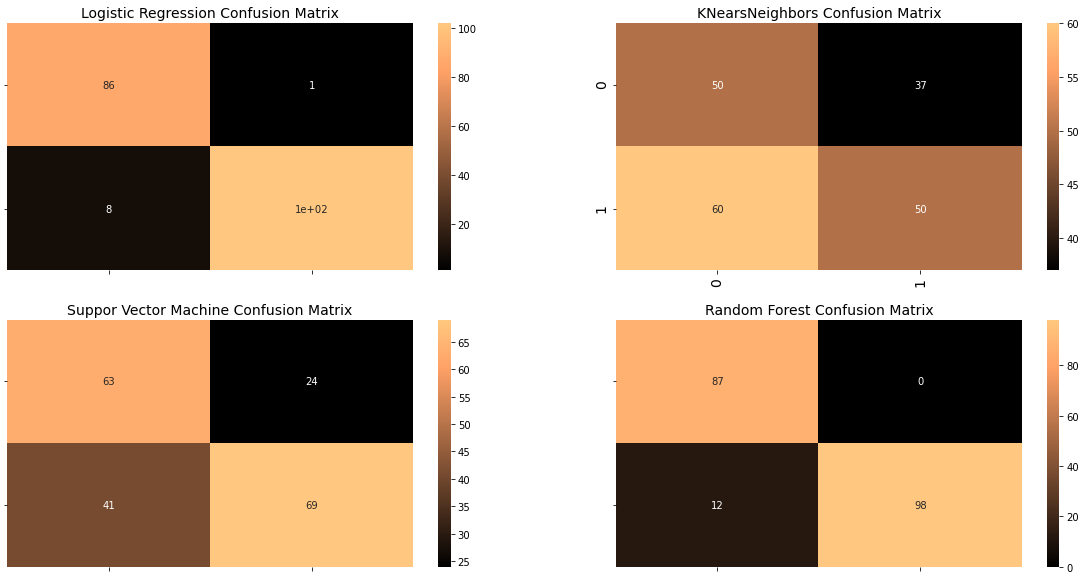

In [22]:
logreg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
gnb = GaussianNB()

# Fitting
logreg.fit(X_train_under, y_train_under)
rf.fit(X_train_under, y_train_under)
knn.fit(X_train_under, y_train_under)
svm.fit(X_train_under, y_train_under)
gnb.fit(X_train_under, y_train_under)

y_pred_logreg = logreg.predict(X_test_under)
y_pred_rf = rf.predict(X_test_under)
y_pred_knn = knn.predict(X_test_under)
y_pred_svm = svm.predict(X_test_under)
y_pred_gnb = gnb.predict(X_test_under)

cf_logreg = confusion_matrix(y_test_under, y_pred_logreg)
cf_rf = confusion_matrix(y_test_under, y_pred_rf)
cf_knn = confusion_matrix(y_test_under, y_pred_knn)
cf_svm = confusion_matrix(y_test_under, y_pred_svm)
cf_gnb = confusion_matrix(y_test_under, y_pred_gnb)

# Creating Confusion matrices
fig, ax = plt.subplots(2, 2,figsize=(20,10))

sns.heatmap(cf_logreg, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_knn, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_svm, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Machine Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

Again, we see Logistic Regression and Random Forest Classification outperforming the other models.

## Accuracy, Precision, Recall, F-1 Score

Now we see how the models perform in terms of Accuracy, precision, recall F1-score.

Here, the accuracy and precision is not as important, as the most important aspect is to detect fraudulent transactions.
The recall score is more important for us to consider, as recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

This is the case here, as predicting a fraudulent transaction as valid has a high cost.

The F1-score also is a helpful metric, as F1 Score is a good measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of Actual Negatives = Valid transactions), which is the case here. But we also need to consider, that we have already balanced the dataset, by undersampling. This undermines the importance a bit.

In [23]:
print('Evaluation for Logistic Regression')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_logreg)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_logreg)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_logreg)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_logreg, average='macro')*100, 2), '%')

print('Evaluation for Random Forest Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_rf)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_rf)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_rf)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_rf, average='macro')*100, 2), '%')

print('Evaluation for KNearsNeighbors Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_knn)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_knn)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_knn)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_knn, average='macro')*100, 2), '%')

print('Evaluation for Support Vector Machine Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_svm)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_svm)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_svm)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_svm, average='macro')*100, 2), '%')

print('Evaluation for Gaussian NB Classification')
print('Accuracy:', round(metrics.accuracy_score(y_test_under, y_pred_gnb)*100, 2), '%')
print('Precision:', round(metrics.precision_score(y_test_under, y_pred_gnb)*100, 2), '%')
print('Recall:', round(metrics.recall_score(y_test_under, y_pred_gnb)*100, 2), '%')
print('F1-Score:', round(metrics.f1_score(y_test_under, y_pred_gnb, average='macro')*100, 2), '%')

Evaluation for Logistic Regression
Accuracy: 95.43 %
Precision: 99.03 %
Recall: 92.73 %
F1-Score: 95.4 %
Evaluation for Random Forest Classification
Accuracy: 93.91 %
Precision: 100.0 %
Recall: 89.09 %
F1-Score: 93.89 %
Evaluation for KNearsNeighbors Classification
Accuracy: 67.01 %
Precision: 74.19 %
Recall: 62.73 %
F1-Score: 66.97 %
Evaluation for Support Vector Machine Classification
Accuracy: 50.76 %
Precision: 57.47 %
Recall: 45.45 %
F1-Score: 50.76 %
Evaluation for Gaussian NB Classification
Accuracy: 84.26 %
Precision: 100.0 %
Recall: 71.82 %
F1-Score: 84.24 %


Again Logistic Regression and Random Forest Classification perform best, especially considering the recall score.

## ROC Curve/ AUC

The ROC Curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

We see that the logistic regression and the random forest classification is performing the best, especially when considering the AUC. Meanwhile, the Support Vector Machine classification is performing abysmally. It is just slightly better than random classification.

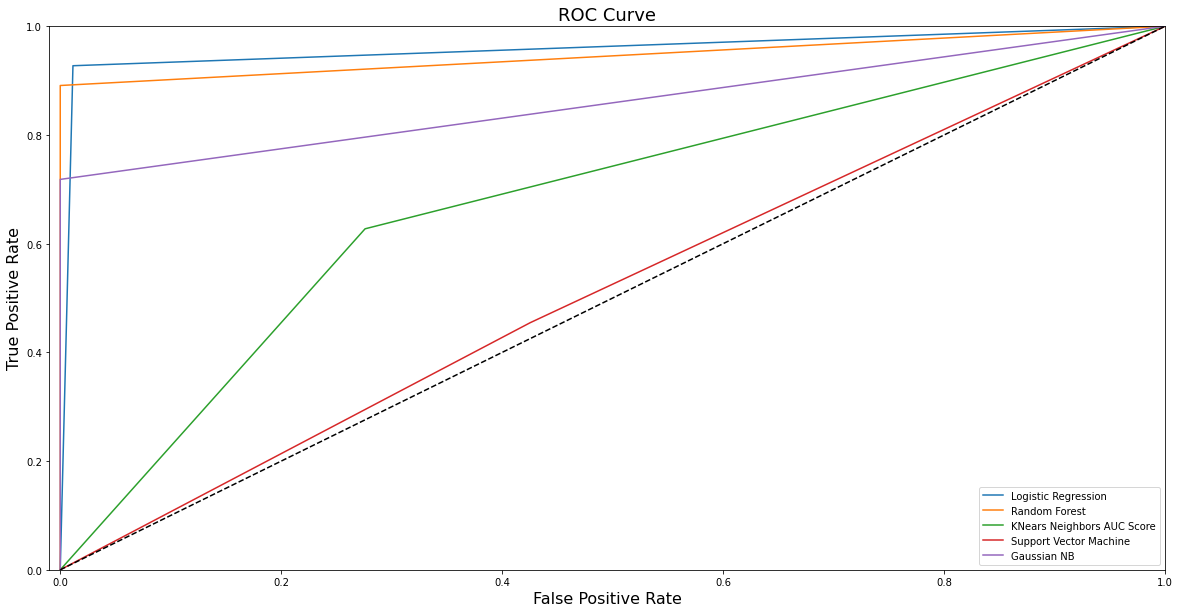

In [24]:
logreg_fpr, logreg_tpr, logreg_thresold = roc_curve(y_test_under, y_pred_logreg)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_under, y_pred_rf)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test_under, y_pred_knn)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test_under, y_pred_svm)
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(y_test_under, y_pred_gnb)

plt.figure(figsize=(20,10))
plt.title('ROC Curve', fontsize=18)

plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors AUC Score')
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine')
plt.plot(gnb_fpr, gnb_tpr, label='Gaussian NB')

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
         
plt.show()

In [30]:
print('The AUC score for Logistic Regression on Undersampled Dataset is:', roc_auc_score(y_test_under, y_pred_logreg))
print('The AUC score for Random Forest on Undersampled Dataset is:', roc_auc_score(y_test_under, y_pred_rf))
print('The AUC score for KNears Neighbors Classifcation on Undersampled Dataset is:', roc_auc_score(y_test_under, y_pred_knn))
print('The AUC score for Support Vector Machines on Undersampled Dataset is:', roc_auc_score(y_test_under, y_pred_svm))
print('The AUC score for Gaussian NB on Undersampled Dataset is:', roc_auc_score(y_test_under, y_pred_gnb))



The AUC score for Logistic Regression on Undersampled Dataset is: 0.957889237199582
The AUC score for Random Forest on Undersampled Dataset is: 0.9454545454545454
The AUC score for KNears Neighbors Classifcation on Undersampled Dataset is: 0.6757053291536051
The AUC score for Support Vector Machines on Undersampled Dataset is: 0.5146290491118077
The AUC score for Gaussian NB on Undersampled Dataset is: 0.8590909090909091


#### Correlation
Now that we have a normalized, balanced dataset we can also look at the correlation matrix again. We can see that the correlations are now a lot clearer, for example we see, that there are positive correlations between V16 and V18 and negative correlations between V2 and V1.

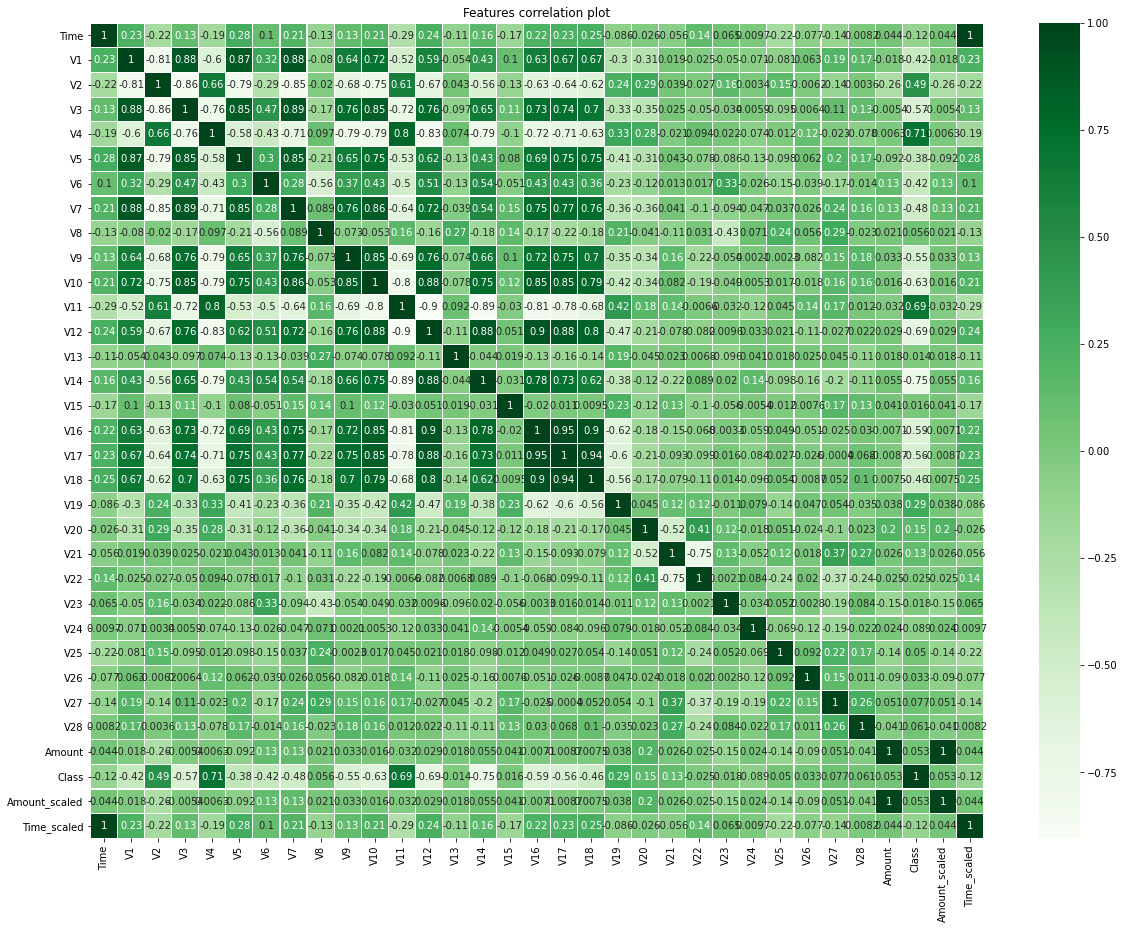

In [26]:
plt.figure(figsize = (20,15))
plt.title('Features correlation plot')
corr = df_under.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot = False)
plt.show()

# Summary

In summary, we observed that logistic regression and random forest learning models are performing the best, especially when it comes to detecting fraudulent transactions.

It is important to balance the dataset prior to training the models, as otherwise precision and accuracy might be high, but fraudulent cases would not be detected.